# 1) Delivery_time -> Predict delivery time using sorting time

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
#To check for null values
df.isnull().any()

Delivery Time    False
Sorting Time     False
dtype: bool

In [ ]:
df.rename(columns={'Delivery Time':'Delivery_time'},inplace=True)
df.rename(columns={'Sorting Time':'Sorting_time'},inplace=True)

In [ ]:
df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Visualization

<Axes: xlabel='Delivery_time', ylabel='Density'>

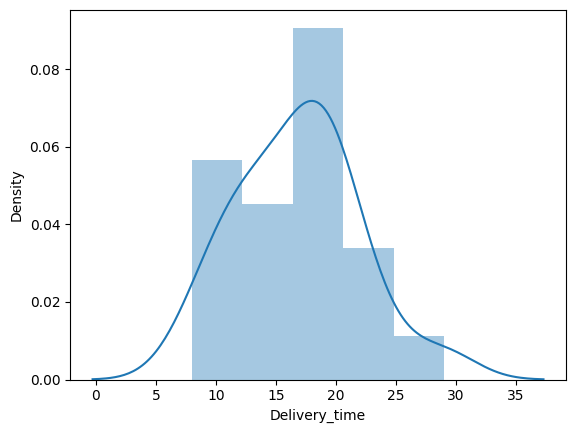

In [ ]:
sns.distplot(df.Delivery_time)

<Axes: xlabel='Sorting_time', ylabel='Density'>

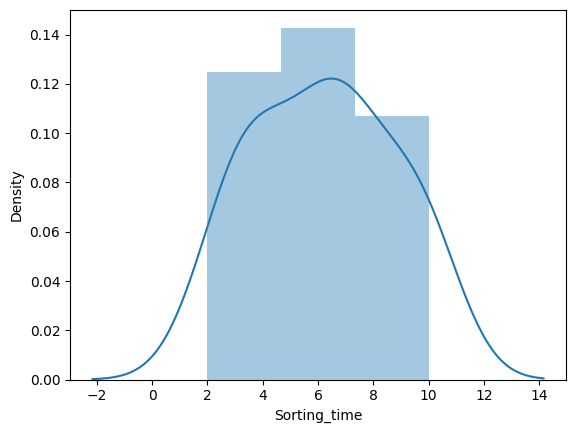

In [ ]:
sns.distplot(df.Sorting_time)

Here both the columns are almost normally distributed and there is no null or missing values in the columns ,the datatypes of the features are also correct.

To check for Outliers

Text(0.5, 1.0, 'Delivery time')

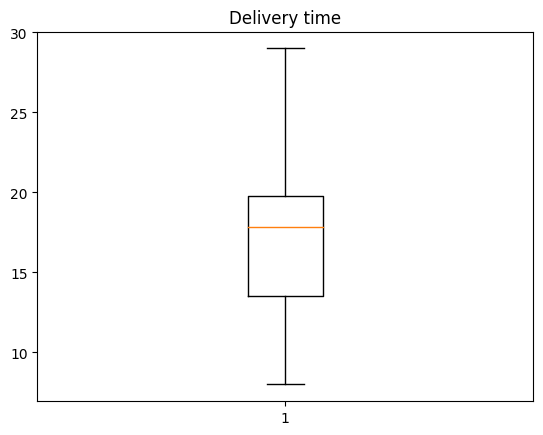

In [ ]:
plt.boxplot(df.Delivery_time)
plt.title("Delivery time")

Text(0.5, 1.0, 'Sorting time')

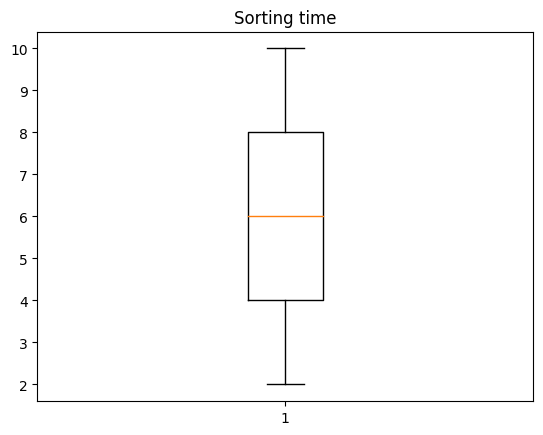

In [ ]:
plt.boxplot(df.Sorting_time)
plt.title("Sorting time")

There are no outliers in both the columns

To check for correlation between the variables

In [ ]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


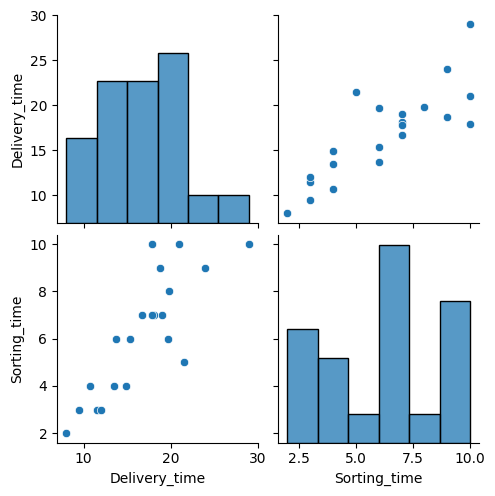

In [ ]:
sns.pairplot(data=df)

<Axes: >

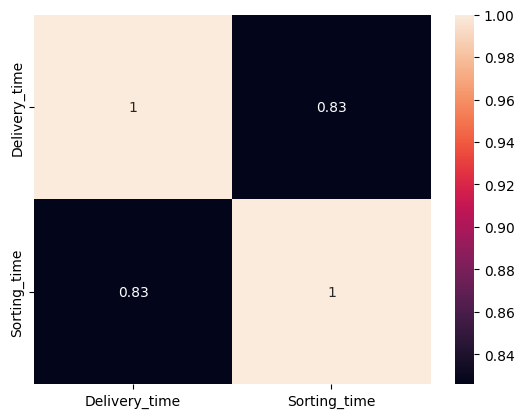

In [ ]:
sns.heatmap(df.corr(),annot=True)

The dependent variable Delivery time and the independent variable Sorting time has a positive correlation 

## Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Delivery_time ~ Sorting_time',data=df).fit()

The line of best fit

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

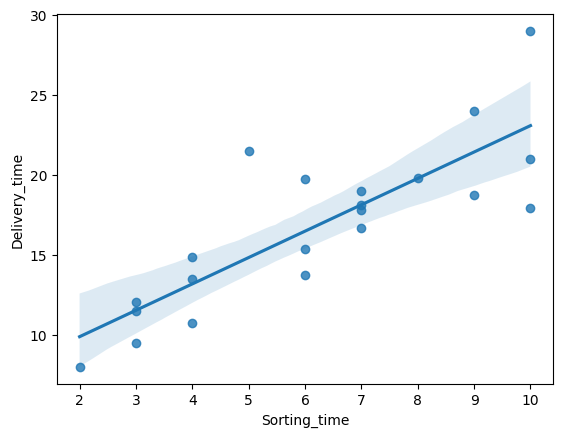

In [ ]:
sns.regplot(x='Sorting_time',y='Delivery_time',data=df)

In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

###  Applying the square on the variables and trying to improve the efficiency of model

In [ ]:
sq_model1=smf.ols('np.square(Delivery_time) ~ np.square(Sorting_time)',data=df).fit()
np.round(sq_model1.rsquared,3)

0.588

In [ ]:
sq_model2=smf.ols('Delivery_time ~ np.square(Sorting_time)',data=df).fit()
np.round(sq_model2.rsquared,4)

0.6303

In [ ]:
sq_model3=smf.ols('np.square(Delivery_time) ~ Sorting_time',data=df).fit()
np.round(sq_model3.rsquared,4)

0.6027

### Applying the sqrt fuction on the variables and trying to improve the efficiency of model

In [ ]:
sqrt_model1=smf.ols('np.sqrt(Delivery_time) ~ np.sqrt(Sorting_time)',data=df).fit()
sqrt_model1.rsquared

0.7292011987544665

In [ ]:
sq_model2=smf.ols('np.sqrt(Delivery_time) ~ Sorting_time',data=df).fit()
sq_model2.rsquared

0.704049871541756

In [ ]:
sq_model3=smf.ols('Delivery_time ~ np.square(Sorting_time)',data=df).fit()
sq_model3.rsquared

0.6302871815826637

### Applying the log fuction on both the variables and trying to improve the efficiency of model

In [ ]:
log_model1=smf.ols('np.log(Delivery_time) ~ np.log(Sorting_time)',data=df).fit()
log_model1.rsquared

0.77216134926874

In [ ]:
#To increse the efficienct of model
log_model2=smf.ols('Delivery_time ~ np.log(Sorting_time)',data=df).fit()
log_model2.rsquared

0.6954434611324223

In [ ]:
log_model3=smf.ols('np.log(Delivery_time) ~ Sorting_time',data=df).fit()
log_model3.rsquared

0.7109478980584187

#### After using the above transformations we can conclude that the log_model1 as the best model as it has the greater rsquare value 

In [ ]:
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 20 May 2023   Prob (F-statistic):           1.60e-07
Time:                           10:20:22   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no null values in the data and has proper datatypes

## Data Visualization

<Axes: xlabel='Salary', ylabel='Density'>

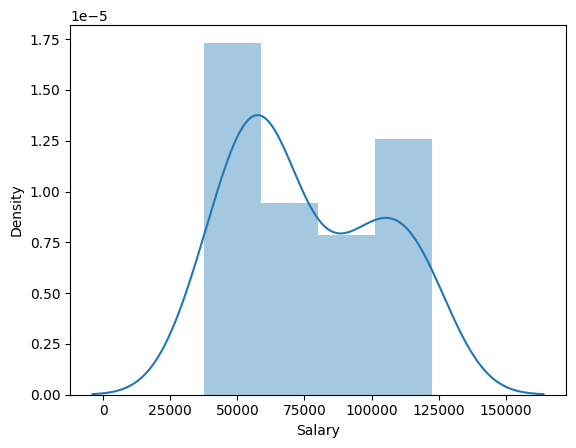

In [ ]:
sns.distplot(data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

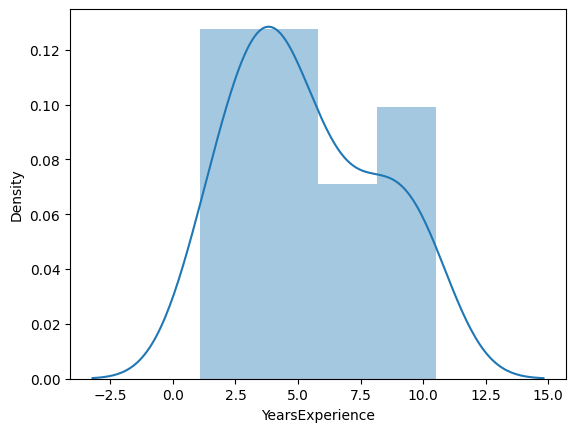

In [ ]:
sns.distplot(data['YearsExperience'])

To check for outliers in data

Text(0.5, 1.0, 'Salary')

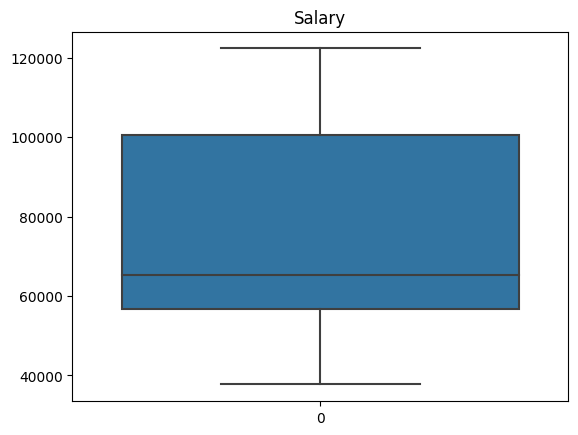

In [ ]:
sns.boxplot(data.Salary)
plt.title('Salary')

Text(0.5, 1.0, 'Years of Experience')

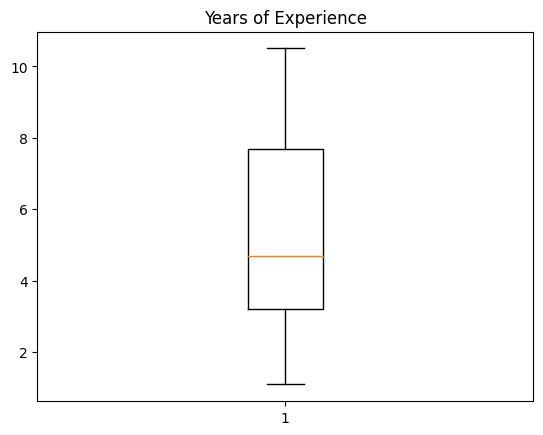

In [ ]:
plt.boxplot(data.YearsExperience)
plt.title("Years of Experience")

There are outliers in both the columns

#### To check for correlation in the variables

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Experience')

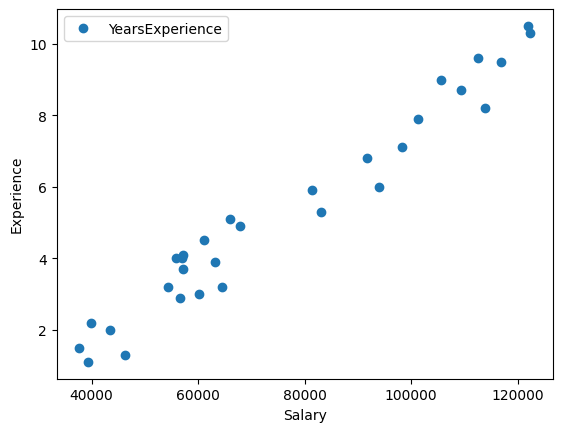

In [ ]:
data.plot(x='Salary',y='YearsExperience',style='o')
plt.ylabel("Experience")

The Salary and the Years of experience are highly positivly correlated

## Model Building

In [ ]:
import statsmodels.formula.api as smf
mod=smf.ols('Salary ~ YearsExperience',data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

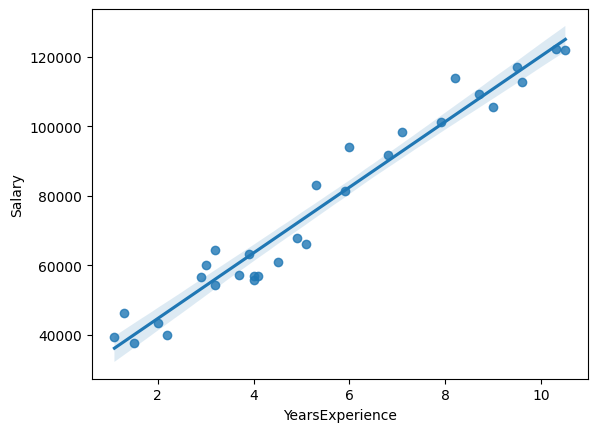

In [ ]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [ ]:
mod.rsquared

In [ ]:
#coefficient
mod.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
print(mod.tvalues ,'\n',mod.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


### Model transformation

In [ ]:
# Using log function
log_mod=smf.ols('np.log(Salary) ~ np.log(YearsExperience)',data=data).fit()
log_mod.rsquared

0.905215072581715

In [ ]:
# Using square function
=smf.ols('np.square(Salary) ~ np.square(YearsExperience)',data=data).fit()
sq_mod.rsquared

0.9540880842110778

In [ ]:
# Using sqrt function
sqrt_mod=smf.ols('np.sqrt(Salary) ~ np.sqrt(YearsExperience)',data=data).fit()
sqrt_mod.rsquared

0.9419490138976825

In [ ]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.14e-20
Time:                        10:34:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model 'mod' without any transformation gives the 0.957 rsquare value hence it can be taken as the best model